# SQL analysis in big data
## Working with SQL to understand songs in Spotify

This assignment focuses on helping you get to grips with a new tool: SQL.

Through this assignment, we will be working with SQL (specifically **pandasql**) by exploring a Spotify dataset containing song reviews and statistics. At parts 3 and 4 you can see some text analysis of song reviews.


## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [155]:
%pip install pandasql
%pip3 install pandas
%pip3 install pandasql
%pip3 install nltk
%pip3 install wordcloud
%pip3 install seaborn

1870.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%pip3` not found.


In [156]:
import pandas as pd
import datetime as dt
import pandasql as ps 
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /Users/loizoskon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [157]:
# Three datasets that I am using (you can download them from here if the code does not work for you put them in the working directory)
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_features.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_rankings.csv

1877.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: command not found: wget


1882.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: command not found: wget


1888.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: command not found: wget


In [158]:
print(pd.__version__ )

1.5.1




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

I'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

Here I'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


I'll be loading this data into various dataframes and querying them. I am primarily using PandaSQL for these tasks. Some tasks though are performed in Pandas.

## Part 1: Loading & Processing our Datasets 

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


So below I am:
* Loading `spotify_songs.csv` and saving the data to a dataframe called `songs_df`.
* Loading `spotify_rankings.csv` and saving the data to a dataframe called `rankings_df`.
* Loading `spotify_features.csv` and saving the data to a dataframe called `features_df` without the index column being included.

In [159]:
#Importing the datasets to pandas dataframes 
songs_df = pd.read_csv("spotify_songs.csv")
rankings_df = pd.read_csv("spotify_rankings.csv")
features_df = pd.read_csv("spotify_features.csv")

In [160]:
# view songs_df to make sure the import was successful
display(songs_df)

,id,name,artists,duration_ms,time_signature,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,4,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,4,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,4,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,4,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,4,Your voice is awesome
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,4,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,4,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,4,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,4,Good lyrics...


In [161]:
# view rankings_df to make sure the import was successful
display(rankings_df)

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...,...
3441192,3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [162]:
# view features_df to make sure the import was successful
display(features_df)

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019
4,4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817
96,96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797
97,97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963
98,98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075


### 1.1 Data Preprocessing
I am now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. We may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [163]:
# view info information regarding movies_df
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

* Here I am Dropping the column `time_signature` as it will not be relevant for this analysis.

In [164]:
#clean songs_df
songs_df = songs_df[['id',	'name',	'artists',	'duration_ms', 'reviews']]
songs_df

,id,name,artists,duration_ms,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome
...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

Below I am:
- Sorting the `Date` column in ascending order
- Splitting the strings in the `URL` column to extract the ID for each song, and saving this as a new column called `ID` in `rankings_df`
- Dropping the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [165]:
#extract ID and drop URL
rankings_df = rankings_df.sort_values(by=['Date'], ascending=True) #sort ascending order
rankings_df['ID'] = rankings_df['URL'].str.split('/').str[-1].tolist() #create an ID column, split from 'track/', the [1] puts it in an array. tolist() ID
rankings_df = rankings_df[['Position', 'Track Name', 'Artist', 'Streams', 'Date', 'Region', 'ID']]
rankings_df
# rankings_df = rankings_df.split()

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [166]:
# Examine rankings_df using the .info() function
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   Date        object
 5   Region      object
 6   ID          object
dtypes: int64(2), object(5)
memory usage: 210.0+ MB



Now let's:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [167]:
rankings_df = rankings_df.dropna()
rankings_df['Date'] = rankings_df['Date'].astype('datetime64')
rankings_df

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/661023765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings_df['Date'] = rankings_df['Date'].astype('datetime64')


,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


## Part 2: Exploring the Data with PandasSQL (and Pandas)

Now that we're more familiar with the dataset, we'll now go in SQL language. Specifically, I'll be using **pandasql**

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!


###2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

Using **pandas**, let's filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, let's save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [168]:
#Using pandas to obtain songs by `Bruno Mars`
# bruno_df = songs_df.groupby('artists' == 'Bruno Mars')
bruno_df = songs_df[songs_df['artists'] == 'Bruno Mars']
# bruno_df = songs_df.groupby() #how to get b mars
bruno_df = bruno_df[['name', 'reviews']]
bruno_df

,name,reviews
8,That's What I Like,You have a really cool voice! I like the way y...
59,24K Magic,Lyrics are very good. Backing sounds nice.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

Here we update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [169]:
#Using pandasql to obtain only "good" songs of bruno mars
good_song_query = """SELECT * FROM bruno_df WHERE reviews LIKE '%good%'""" # syntax after like == wildcards - look at the string and ignore everything before% and after% 'good'
bruno_df = ps.sqldf(good_song_query, locals())
bruno_df

,name,reviews
0,24K Magic,Lyrics are very good. Backing sounds nice.


###2.2 You can seeing the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.
 
* You can see the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`




In [170]:
rankings_df.describe()
# we use `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.

,Position,Streams
count,3.440540e+06,3.440540e+06
mean,9.465220e+01,5.188452e+04
std,5.739412e+01,2.017733e+05
min,1.000000e+00,1.001000e+03
25%,4.500000e+01,3.321000e+03
50%,9.200000e+01,9.226000e+03
75%,1.430000e+02,2.965600e+04
max,2.000000e+02,1.138152e+07


In [171]:
rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [172]:
streams_df = rankings_df.groupby(by = 'Track Name').sum()
streams_df
# Using pandas extract the total number of streams per song from rankings_df
# streams_df = rankings_df['Streams'>2.965800e+04]

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/1744104746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  streams_df = rankings_df.groupby(by = 'Track Name').sum()


,Position,Streams
Track Name,,
"""All That Is or Ever Was or Ever Will Be""",383,7311
"""Read All About It, Pt. III""",2306,57025
#99,1126,31826
#Askip,3184,296862
#Biziz - feat. Lil Bege,4488,403591
...,...,...
전야 前夜 The Eve,17063,976392
지나갈 테니 Been Through,1180,87456
쩔어 DOPE,7545,209493


In [173]:
streams_df.describe()

,Position,Streams
count,1.859700e+04,1.859700e+04
mean,1.751114e+04,9.598901e+06
std,7.505320e+04,6.903221e+07
min,1.000000e+01,1.001000e+03
25%,3.200000e+02,2.133400e+04
50%,1.362000e+03,1.225160e+05
75%,7.620000e+03,1.072171e+06
max,1.604987e+06,2.993989e+09


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%. 

We filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [174]:
streams_df

,Position,Streams
Track Name,,
"""All That Is or Ever Was or Ever Will Be""",383,7311
"""Read All About It, Pt. III""",2306,57025
#99,1126,31826
#Askip,3184,296862
#Biziz - feat. Lil Bege,4488,403591
...,...,...
전야 前夜 The Eve,17063,976392
지나갈 테니 Been Through,1180,87456
쩔어 DOPE,7545,209493


In [175]:
#Using pandasql extract the top 75% based on number of streams
top_query = """
SELECT * 
FROM streams_df
WHERE Streams > 21334
"""

sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

,Track Name,Position,Streams
0,"""Read All About It, Pt. III""",2306,57025
1,#99,1126,31826
2,#Askip,3184,296862
3,#Biziz - feat. Lil Bege,4488,403591
4,#CTZK,20515,669563
...,...,...,...
13941,전야 前夜 The Eve,17063,976392
13942,지나갈 테니 Been Through,1180,87456
13943,쩔어 DOPE,7545,209493
13944,피 땀 눈물,2757,68673


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

Using **pandas**, we filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Creating a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extracting only songs whose duration is at least 3 minutes and at most 5 minutes. Then, saving the output to `ideal_songs_df`.


In [176]:
songs_df

,id,name,artists,duration_ms,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome
...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...


In [177]:
songs_df #convert ms to min
songs_df['duration_min'] =  songs_df['duration_ms'] / 60000
ideal_songs_df = songs_df[(songs_df['duration_min'] >= 3) & (songs_df['duration_min'] <=5)]
ideal_songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

Using the dataframe `rankings_df`, we perform the following tasks on **pandasql**:
- We extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, You can see the number of times each artist was ranked #1
- Then we get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [178]:
# pandasql
pos_query = """ 
SELECT Artist, COUNT (Position) AS Position
FROM rankings_df
WHERE Position = 1
GROUP BY Artist
ORDER BY Position DESC
LIMIT 10
"""

sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's see!



- We consider rows in `rankings_df` that are during Summer 2017 
  - I assume that the duration of summer is from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Then I am finding the total number of streams corresponding to each artist, then storing this data in a new column called `Number`. 
- Then I am sorting this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).

Calling the output dataframe `sql_summer_df`.

In [179]:
#pandasql
summer_query = """
SELECT Artist, SUM(Streams) AS Number
FROM rankings_df
WHERE strftime ('%Y-%m-%d', DATE) BETWEEN '2017-06-15' AND '2017-09-16'
GROUP BY Artist
ORDER BY Number DESC
"""

sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to You can see the songs with high danceability and low tempo.

STEPS to to solution:
- Round the `danceability` column to one decimal place, and calling the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `sql_songs_features_df`.


In [180]:
#pandasql
song_feature_query = """
SELECT *, ROUND (danceability, 1) AS r_danceability
FROM features_df
JOIN songs_df ON features_df.id = songs_df.id
ORDER BY ROUND (danceability, 1) DESC, tempo ASC
"""


sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

,Unnamed: 0,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,name,artists,duration_ms,reviews,duration_min,r_danceability
0,94,2fQrGHiQOvpL9UgPvtYy6,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.3760,75.016,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783,0.9
1,42,5bcTCxgc7xVfSaMV3RuVk,0.893,0.745,11.0,-3.105,0.0,0.0571,0.0642,0.000000,0.0943,0.8720,101.018,5bcTCxgc7xVfSaMV3RuVk,Feels,Calvin Harris,223413,Overall quite a nice sound.,3.723550,0.9
2,47,6mICuAdrwEjh6Y6lroV2K,0.852,0.773,8.0,-2.921,0.0,0.0776,0.1870,0.000030,0.1590,0.9070,102.034,6mICuAdrwEjh6Y6lroV2K,Chantaje,Shakira,195840,NICE TUNE WITH SOME NEAT CHORD CHANGES....VERY...,3.264000,0.9
3,38,6EpRaXYhGOB3fj4V2uDkM,0.869,0.485,6.0,-5.595,1.0,0.0545,0.2460,0.000000,0.0765,0.5270,106.028,6EpRaXYhGOB3fj4V2uDkM,Strip That Down,Liam Payne,204502,Rich clean vocals. Nice incidental instrumenta...,3.408367,0.9
4,91,4c2W3VKsOFoIg2SFaO6DY,0.855,0.624,1.0,-4.093,1.0,0.0488,0.1580,0.000000,0.0513,0.9620,117.959,4c2W3VKsOFoIg2SFaO6DY,Your Song,Rita Ora,180757,"Great music ,Great voice ,arrangement, etc.",3.012617,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,4pdPtRcBmOSQDlJ3Fk945,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,205947,"Nice melodies, especially in the beginning. Ha...",3.432450,0.5
96,22,5uCax9HTNlzGybIStD3vD,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.4940,85.043,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go,James Arthur,211467,"truely unique, i like it",3.524450,0.4
97,63,6520aj0B4FSKGVuKNsOCO,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.1460,0.4620,189.798,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,237734,"Like the recording .nice and clear,smooth",3.962233,0.4
98,66,5hYTyyh2odQKphUbMqc5g,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.1590,179.666,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,175517,Kind of reminds me of new music.,2.925283,0.3


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

- Extracted rows belonging to the top 2 regions that have the most streams. 
- Storeed output in a new dataframe called `sql_top_regions_df`. The schema is as `rankings_df`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [181]:
#pandas
pd_top_regions_df = rankings_df[rankings_df['Region'] != 'global'] #remove global from column region
pd_top_regions_df = pd_top_regions_df.groupby(by = 'Region').sum().reset_index() #group by Region
pd_top_regions_df = pd_top_regions_df.sort_values(by = ['Streams'], ascending = [False]).head(2) #We want the ones with most Streams
pd_top_regions_df = rankings_df[rankings_df['Region'].isin(['us', 'gb'])] #checking for us and gb
pd_top_regions_df #we use that in pandasql below in our subquery

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/905598242.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_top_regions_df = pd_top_regions_df.groupby(by = 'Region').sum().reset_index() #group by Region


,Position,Track Name,Artist,Streams,Date,Region,ID
3042585,143,The Sound,The 1975,30799,2017-01-01,gb,316r1KLN0bcmpr7TZcMCX
3042584,142,Is This Love - Remix,Bob Marley & The Wailers,31000,2017-01-01,gb,1w5sLDYzYAGI0AkLc6FPl
3042583,141,Sidewalks,The Weeknd,31453,2017-01-01,gb,4h90qkbnW1Qq6pBhoPvwk
3042582,140,False Alarm,Matoma,31527,2017-01-01,gb,7gZQfdEQpmwAoPHSbEHzm
3042581,139,Jumpman,Drake,31716,2017-01-01,gb,27GmP9AWRs744SzKcpJsT
...,...,...,...,...,...,...,...
845636,15,Pick It Up (feat. A$AP Rocky),Famous Dex,687929,2018-01-09,us,3ncgNpxLoBQ65ABk4djDy
845635,14,River (feat. Ed Sheeran),Eminem,724892,2018-01-09,us,5UEnHoDYpsxlfzWLZIc7L
845634,13,Candy Paint,Post Malone,735421,2018-01-09,us,42CeaId2XNlxugDvyqHfD
845632,11,Codeine Dreaming (feat. Lil Wayne),Kodak Black,839826,2018-01-09,us,4DTpngLjoHj5gFxEZFeD3


In [182]:
#pandasql
top_regions_query = """
SELECT *
FROM rankings_df
WHERE Region IN (
  SELECT Region FROM pd_top_regions_df
  WHERE Region<>'global'
  LIMIT 2
)
ORDER BY Streams DESC
"""


sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Last Christmas,Wham!,1357938,2017-12-25 00:00:00.000000,gb,2FRnf9qhLbvw8fu4IBXx7
1,1,Shape of You,Ed Sheeran,1323982,2017-01-09 00:00:00.000000,gb,7qiZfU4dY1lWllzX7mPBI
2,2,All I Want for Christmas Is You,Mariah Carey,1299377,2017-12-25 00:00:00.000000,gb,0bYg9bo50gSsH3LtXe2SQ
3,1,Shape of You,Ed Sheeran,1280898,2017-01-06 00:00:00.000000,gb,7qiZfU4dY1lWllzX7mPBI
4,1,Shape of You,Ed Sheeran,1258743,2017-01-10 00:00:00.000000,gb,7qiZfU4dY1lWllzX7mPBI
...,...,...,...,...,...,...,...
74185,196,Famous,Kanye West,25248,2017-01-01 00:00:00.000000,gb,19a3JfW8BQwqHWUMbcqSx
74186,197,Girls Just Want to Have Fun,Cyndi Lauper,25176,2017-01-01 00:00:00.000000,gb,4y1LsJpmMti1PfRQV9AWW
74187,198,Dog Days Are Over,Florence + The Machine,24904,2017-01-01 00:00:00.000000,gb,1YLJVmuzeM2YSUkCCaTNU
74188,199,Half the World Away - Remastered,Oasis,24806,2017-01-01 00:00:00.000000,gb,6z1Xz89avh1KA7d3Ek7DQ


#### 2.7.2 Do the regions with the most streams like different songs?

- Finding the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Storing the result in a new dataframe called `sql_diff_tracks_df`. 

In [183]:
#pandasql

diff_tracks_query = """
WITH USdf AS(
   SELECT DISTINCT `Track Name`, Artist, ID
   FROM pd_top_regions_df
   WHERE Region='us'),

GBdf AS (
  SELECT DISTINCT `Track Name`, Artist, ID
  FROM pd_top_regions_df
  WHERE Region='gb'),

USonly AS (
  SELECT USdf.`Track Name`, USdf.Artist, USdf.ID as ID 
  FROM USdf
  LEFT JOIN GBdf ON USdf.id = GBdf.id
  WHERE GBdf.id IS NULL),

 GBonly AS (
   SELECT USdf.`Track Name`, USdf.Artist, GBdf.ID as ID
   FROM GBdf
   LEFT JOIN USdf ON USdf.id = GBdf.id
   WHERE USdf.id IS NULL)

 SELECT * FROM USonly
 UNION
 SELECT * FROM GBonly
"""
sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

,Track Name,Artist,ID
0,None,None,00l1uBtEO4WwmsfxqbeTW
1,None,None,0181HMomm7xM3Ks5YNlA9
2,None,None,01VXGDL8Ox3SWmvM8ZyvS
3,None,None,023lag1AgeOf7YChojecR
4,None,None,02KgB1Qyk4PrFweUMGl9N
...,...,...,...
2447,playboy shit (feat. lil aaron),blackbear,031QO44Ql8D7D3ePdI7fk
2448,santa monica & la brea,blackbear,3Tvs5NbIqszxl7ctruIqa
2449,top priority (with Ne-Yo),blackbear,2yjwPmZ3XKKoVVPzKQ9d0
2450,up in this (with Tinashe),blackbear,7xmaCmiSOCtQ6nFENK22b


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's You can see some songs to groove to!

- You can see the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- You can see the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- The result is stored in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [184]:
#SQL SKELETON

# FROM
# WHERE
# _______
# GROUP BY
# HAVING
# ________
# SELECT
# _______
# ORDER BY
# LIMIT

In [185]:
rankings_df.rename(columns = {'ID':'id'}, inplace = True)
rankings_df
#making ID work as id

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/2501768206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings_df.rename(columns = {'ID':'id'}, inplace = True)


,Position,Track Name,Artist,Streams,Date,Region,id
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
...,...,...,...,...,...,...,...
1498830,109,Sky Walker,Miguel,1581,2018-01-09,hu,5WoaF1B5XIEnWfmb5NZik
1498829,108,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,1582,2018-01-09,hu,7F9vK8hNFMml4GtHsaXui
1498828,107,Betrayed,Lil Xan,1582,2018-01-09,hu,6NWl2m8asvH83xjuXVNsu
1498841,120,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1490,2018-01-09,hu,5knuzwU65gJK7IF5yJsua


In [186]:
#pandasql
dance_query = """
SELECT DISTINCT Artist,	`Track Name`,	danceability
FROM songs_df AS s 
  JOIN rankings_df AS r ON r.id= s.id
  JOIN features_df AS f ON f.id=r.id
WHERE duration_min > 3
  AND strftime('%Y-%m-%d', DATE) BETWEEN '2017-12-01' AND '2017-12-31'
  AND danceability	> 0.5
"""

sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

,Artist,Track Name,danceability
0,Ed Sheeran,Shape of You,0.825
1,Luis Fonsi,Despacito - Remix,0.694
2,Luis Fonsi,Despacito (Featuring Daddy Yankee),0.660
3,The Chainsmokers,Something Just Like This,0.617
4,DJ Khaled,I'm the One,0.609
...,...,...,...
80,Justin Bieber,Friends (with BloodPop®),0.744
81,21 Savage,Bank Account,0.884
82,Machine Gun Kelly,Bad Things (with Camila Cabello),0.675
83,The Chainsmokers,Don't Let Me Down,0.542


## Part 3: Data Visualization 

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- You can see the song that had the *most* streams on `2017-01-01`
- You can see the song that had the *least* streams on `2017-01-01`
- You can see the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

The line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.



In [187]:
#first we take a look which songs are streamed the most
filter_rankings = rankings_df[(rankings_df['Date'] == '2017-01-01')] #setting the date asked
filter_rankings = filter_rankings.groupby('id').sum().reset_index()
sorted_rankings = filter_rankings.sort_values(by=['Streams'], ascending=False).reset_index() #sorting from most streams to least
top_bottom_rankings = pd.concat([sorted_rankings.head(1), sorted_rankings.tail(1)]) #getting the most and least streamed song 
display(top_bottom_rankings)

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/745237006.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filter_rankings = filter_rankings.groupby('id').sum().reset_index()


,index,id,Position,Streams
0,1690,5aAx2yezTd8zXrkmtKl66,422,6266206
2360,2302,7qxgfIAuWUY9VHLn35Sqw,199,1001


In [188]:
#You can see the no. of streams that these two songs received on the first day of each month in 2017
list_of_dates = ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
                 '2017-10-01', '2017-11-01', '2017-12-01']

all_months_rankings = rankings_df[rankings_df['Date'].isin(list_of_dates)] #filter for list_of_dates asked
all_months_rankings = all_months_rankings[all_months_rankings['id'].isin(top_bottom_rankings['id'])]
all_months_rankings



,Position,Track Name,Artist,Streams,Date,Region,id
2755014,18,Starboy,The Weeknd,16013,2017-01-01,co,5aAx2yezTd8zXrkmtKl66
2732400,1,Starboy,The Weeknd,2197,2017-01-01,sk,5aAx2yezTd8zXrkmtKl66
462008,10,Starboy,The Weeknd,104708,2017-01-01,ph,5aAx2yezTd8zXrkmtKl66
2658204,5,Starboy,The Weeknd,76076,2017-01-01,nl,5aAx2yezTd8zXrkmtKl66
445200,1,Starboy,The Weeknd,2583,2017-01-01,lt,5aAx2yezTd8zXrkmtKl66
...,...,...,...,...,...,...,...
2272744,185,Starboy,The Weeknd,44109,2017-12-01,mx,5aAx2yezTd8zXrkmtKl66
2124327,168,Starboy,The Weeknd,2765,2017-12-01,pt,5aAx2yezTd8zXrkmtKl66
837998,177,Starboy,The Weeknd,219100,2017-12-01,us,5aAx2yezTd8zXrkmtKl66
763686,65,Starboy,The Weeknd,13676,2017-12-01,tr,5aAx2yezTd8zXrkmtKl66


In [190]:
IDdateGroup = all_months_rankings.groupby(['id', 'Date']).sum().reset_index()
IDdateGroup

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/1523896782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IDdateGroup = all_months_rankings.groupby(['id', 'Date']).sum().reset_index()


,id,Date,Position,Streams
0,5aAx2yezTd8zXrkmtKl66,2017-01-01,422,6266206
1,5aAx2yezTd8zXrkmtKl66,2017-02-01,939,5697420
2,5aAx2yezTd8zXrkmtKl66,2017-03-01,1803,4259480
3,5aAx2yezTd8zXrkmtKl66,2017-04-01,2609,3263163
4,5aAx2yezTd8zXrkmtKl66,2017-05-01,4094,2179513
5,5aAx2yezTd8zXrkmtKl66,2017-06-01,4306,1906610
6,5aAx2yezTd8zXrkmtKl66,2017-07-01,4027,1641376
7,5aAx2yezTd8zXrkmtKl66,2017-08-01,3973,1348133
8,5aAx2yezTd8zXrkmtKl66,2017-09-01,4190,1380447
9,5aAx2yezTd8zXrkmtKl66,2017-10-01,3558,1061926


In [191]:
IDdateGroup = all_months_rankings.groupby(['id', 'Date']).sum().reset_index()
IDdateGroup

/var/folders/71/m9n1tm292gg25xn0m44ccvxh0000gn/T/ipykernel_13596/1523896782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IDdateGroup = all_months_rankings.groupby(['id', 'Date']).sum().reset_index()


,id,Date,Position,Streams
0,5aAx2yezTd8zXrkmtKl66,2017-01-01,422,6266206
1,5aAx2yezTd8zXrkmtKl66,2017-02-01,939,5697420
2,5aAx2yezTd8zXrkmtKl66,2017-03-01,1803,4259480
3,5aAx2yezTd8zXrkmtKl66,2017-04-01,2609,3263163
4,5aAx2yezTd8zXrkmtKl66,2017-05-01,4094,2179513
5,5aAx2yezTd8zXrkmtKl66,2017-06-01,4306,1906610
6,5aAx2yezTd8zXrkmtKl66,2017-07-01,4027,1641376
7,5aAx2yezTd8zXrkmtKl66,2017-08-01,3973,1348133
8,5aAx2yezTd8zXrkmtKl66,2017-09-01,4190,1380447
9,5aAx2yezTd8zXrkmtKl66,2017-10-01,3558,1061926


<AxesSubplot: xlabel='Date', ylabel='Streams'>

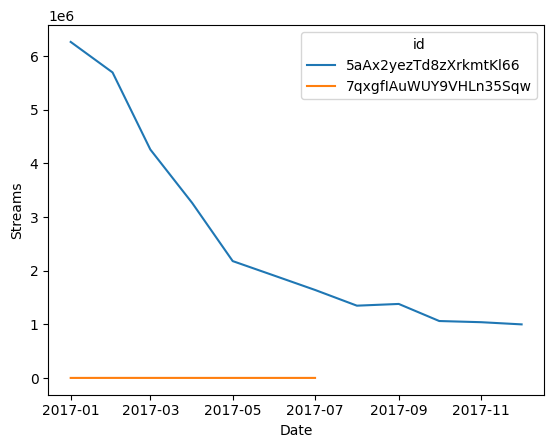

In [192]:
import seaborn
seaborn.lineplot(data=IDdateGroup, x='Date', y='Streams', markers=True, hue='id')

## Part 4: Working with Text Data

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


###4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. We are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

- Using **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implementing the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenizing the text
2. Keeping tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Converting each token to lowercase
4. Removing stopwords (commonly used words such as "a", "an", "in")


In [193]:
import nltk
nltk.__version__

'3.7'

In [194]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loizoskon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
from nltk.tokenize import word_tokenize

def tokenize_content(content):
  content = word_tokenize(content)
  content = [word for word in content if word.isalpha()]
  content = [word.lower() for word in content]
  content = [word for word in content if word not in stopwords]
  return content

What is happening in the following columns
- Extracting the `reviews` column of `songs_df` as a list called `reviews`. 
- Applying your `tokenize_content()` function to each item in the list `reviews`. 
    Calling the resultant list `top_tokens_list`. 
- Flattening the list `top_tokens_list`, and call the resultant list **top_tokens**. 

In [196]:
reviews = songs_df['reviews'].tolist() #Extract the reviews column of songs_df as a list called reviews.

In [197]:
# tokenize and flatten

top_tokens_list = []
for i in reviews:
     top_tokens_list.append(tokenize_content(i))

top_tokens = [item for sublist in top_tokens_list for item in sublist]

### 4.2 Most Frequent Words
Here you can see the 20 most common words in the list `top_tokens`. Saving the result as a list of `(word, count)` tuples, in descending order of `count`.

For this question, `Counter` from the Python `collections` library is used: https://docs.python.org/2/library/collections.html#counter-objects

In [198]:
from collections import Counter
count = Counter(top_tokens)
top_most_common = count.most_common(20)
print(top_most_common)

[('good', 35), ('nice', 31), ('like', 26), ('song', 21), ('voice', 18), ('great', 14), ('really', 13), ('unique', 12), ('lyrics', 12), ('sound', 11), ('love', 9), ('interesting', 9), ('vocal', 8), ('tune', 8), ('vocals', 8), ('instrumentation', 7), ('melody', 7), ('music', 7), ('feel', 6), ('overall', 6)]


### 4.3 Word Clouds

Before we move on from this dataset, let's visualize our results using a word cloud.

Here I create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 



In [199]:
import re #Load the regular expression library
import wordcloud # Import the wordcloud library

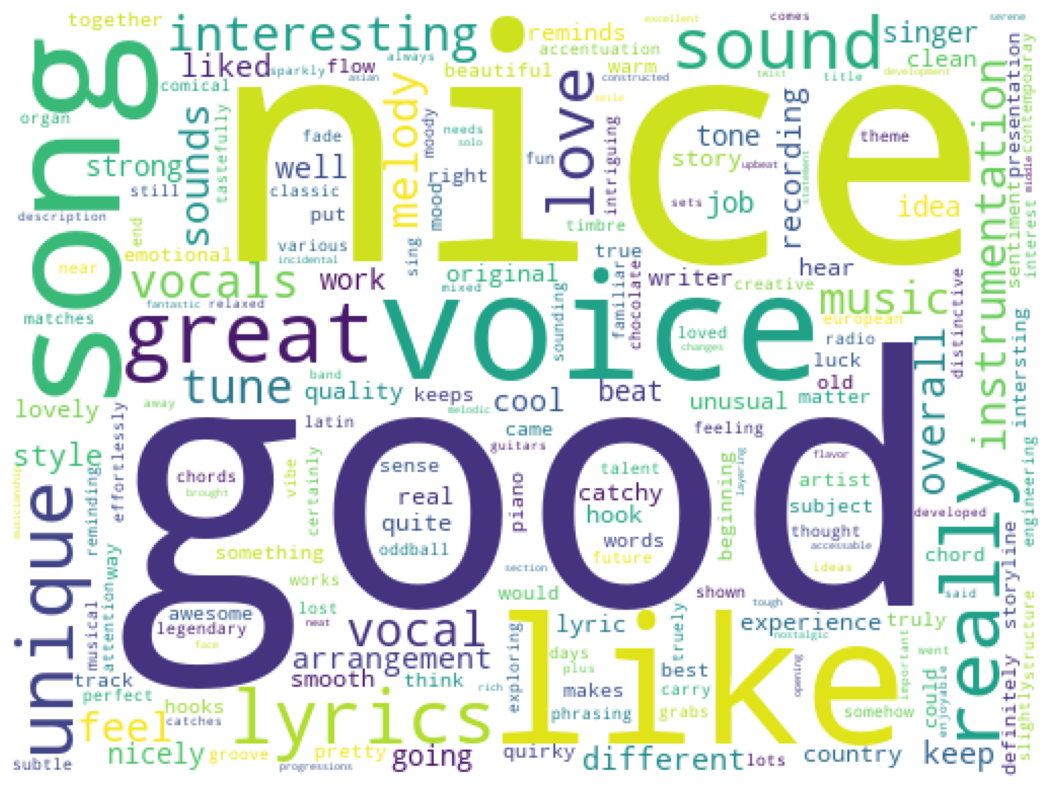

In [200]:
# Print the titles of the first rows 
#Here I create a word cloud for top tokens
plt.subplots(figsize = (20,10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 510,
                    height = 380
                        ).generate_from_frequencies(count)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()